# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN on augmented images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

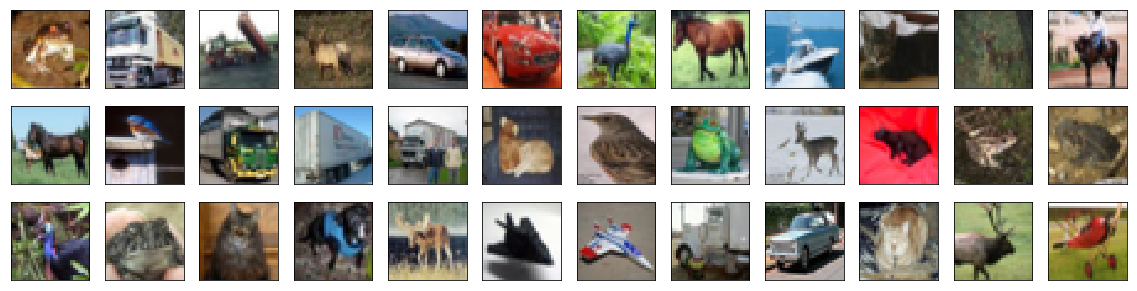

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Create and Configure Augmented Image Generator

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(width_shift_range=.1, 
                                   height_shift_range=.1, horizontal_flip=True)

datagen_train.fit(x_train)

### 6. Visualize Original and Augmented Images

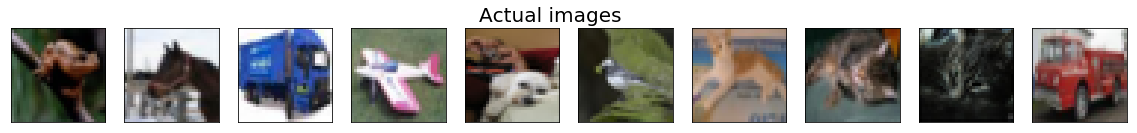

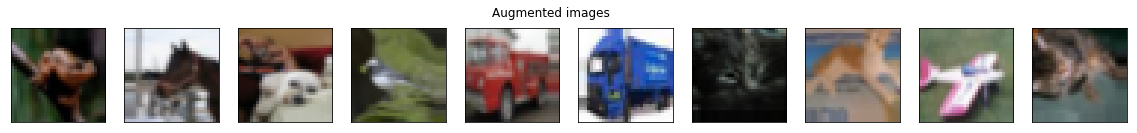

In [18]:
fig = plt.figure(figsize=(20,2))
fig.suptitle('Actual images', fontsize=20)
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
  
fig = plt.figure(figsize=(20,2))
fig.suptitle('Augmented images')
for x_batch in datagen_train.flow(x_train[:10]):
    for i in range(10):
        ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break;


### 7. Define the Model Architecture 

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 8. Compile the Model 

In [20]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 9. Train the Model 

In [21]:
from keras.callbacks import ModelCheckpoint   

batch_size = 32
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.mine.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(x_valid, y_valid),
                    validation_steps=x_valid.shape[0] // batch_size)

Epoch 1/100
 - 64s - loss: 1.6690 - acc: 0.3944 - val_loss: 1.5590 - val_acc: 0.4352

Epoch 00001: val_loss improved from inf to 1.55902, saving model to aug_model.weights.best.hdf5
Epoch 2/100
 - 54s - loss: 1.3915 - acc: 0.4976 - val_loss: 1.1726 - val_acc: 0.5744

Epoch 00002: val_loss improved from 1.55902 to 1.17256, saving model to aug_model.weights.best.hdf5
Epoch 3/100
 - 52s - loss: 1.2954 - acc: 0.5354 - val_loss: 1.2066 - val_acc: 0.5770

Epoch 00003: val_loss did not improve from 1.17256
Epoch 4/100
 - 55s - loss: 1.2305 - acc: 0.5648 - val_loss: 1.1527 - val_acc: 0.5934

Epoch 00004: val_loss improved from 1.17256 to 1.15274, saving model to aug_model.weights.best.hdf5
Epoch 5/100
 - 57s - loss: 1.2038 - acc: 0.5731 - val_loss: 1.1211 - val_acc: 0.6062

Epoch 00005: val_loss improved from 1.15274 to 1.12108, saving model to aug_model.weights.best.hdf5
Epoch 6/100
 - 57s - loss: 1.1766 - acc: 0.5859 - val_loss: 1.1099 - val_acc: 0.6174

Epoch 00006: val_loss improved from 1


Epoch 00057: val_loss did not improve from 0.96785
Epoch 58/100
 - 45s - loss: 1.7209 - acc: 0.3980 - val_loss: 1.4333 - val_acc: 0.4888

Epoch 00058: val_loss did not improve from 0.96785
Epoch 59/100
 - 41s - loss: 1.7307 - acc: 0.3987 - val_loss: 1.5371 - val_acc: 0.4670

Epoch 00059: val_loss did not improve from 0.96785
Epoch 60/100
 - 42s - loss: 1.7315 - acc: 0.3989 - val_loss: 1.6441 - val_acc: 0.4138

Epoch 00060: val_loss did not improve from 0.96785
Epoch 61/100
 - 45s - loss: 1.7412 - acc: 0.3928 - val_loss: 1.4887 - val_acc: 0.4616

Epoch 00061: val_loss did not improve from 0.96785
Epoch 62/100
 - 48s - loss: 1.7201 - acc: 0.3974 - val_loss: 1.4584 - val_acc: 0.4834

Epoch 00062: val_loss did not improve from 0.96785
Epoch 63/100
 - 47s - loss: 1.7393 - acc: 0.3899 - val_loss: 1.3981 - val_acc: 0.5170

Epoch 00063: val_loss did not improve from 0.96785
Epoch 64/100
 - 42s - loss: 1.7656 - acc: 0.3822 - val_loss: 1.3737 - val_acc: 0.5254

Epoch 00064: val_loss did not imp

### 10. Load the Model with the Best Validation Accuracy

In [22]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.mine.hdf5')

### 11. Calculate Classification Accuracy on Test Set

In [23]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6665
